# Nursey Data Analysis

This notebook analyze and preprocess the Nursery dataset, which was taken from the [UCI repository](https://archive.ics.uci.edu/ml/datasets/nursery).

## Data Set Information:

As said it in [UCI repository](https://archive.ics.uci.edu/ml/datasets/nursery):

    Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools. It was used during several years in 1980's when there was excessive enrollment to these schools in Ljubljana, Slovenia, and the rejected applications frequently needed an objective explanation. The final decision depended on three subproblems: occupation of parents and child's nursery, family structure and financial standing, and social and health picture of the family. The model was developed within expert system shell for decision making DEX (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). 



For more information about the dataset, see the link above.

## Dependencies

In [176]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [177]:
# Import the data
nurse = pd.read_csv('nursery.data')

In [178]:
nurse.head(10)

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
5,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
6,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
7,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
8,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,priority,priority


As we can see, we must insert the columns.

In [179]:
# Get the columns names as array
new_header = nurse.columns.values
new_header
#header = new_header.copy()
#header[5]='convenient'
# Create the columns
cols = ['parents','has_nurs','form','children','housing','finance','social','health','target']
new_header

array(['usual', 'proper', 'complete', '1', 'convenient', 'convenient.1',
       'nonprob', 'recommended', 'recommend'], dtype=object)

In [180]:

# Create a DataFrame from the hedader
nur = pd.DataFrame(new_header[None,:],columns=list(new_header))
# Append both the dataframes
nur = nur.append(nurse)
nur
# Rename the columns
col = {}
for i in range(new_header.size):
    if i!=5:
        col[new_header[i]]= cols[i]
    elif i==5:
        col['convenient.1']= cols[i]
        
print(col)
nur=nur.rename(columns=col)
nur.loc[0,'finance']='convenient'
nur = nur.reset_index(drop=True)
nur.head(10)

{'usual': 'parents', 'proper': 'has_nurs', 'complete': 'form', '1': 'children', 'convenient': 'housing', 'convenient.1': 'finance', 'nonprob': 'social', 'recommended': 'health', 'recommend': 'target'}


,parents,has_nurs,form,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


## Dataset information and description

Let's analyze the information about this dataset, and it's description.

In [181]:
nur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
parents     12960 non-null object
has_nurs    12960 non-null object
form        12960 non-null object
children    12960 non-null object
housing     12960 non-null object
finance     12960 non-null object
social      12960 non-null object
health      12960 non-null object
target      12960 non-null object
dtypes: object(9)
memory usage: 911.3+ KB


As we can see there are 8 features and 1 target column. Luckly there are no missing data, and all of datatype are object, so we will transform it into encoded labels, and other one will be one hot encoded.

In [182]:
descript = nur.describe()
descript

,parents,has_nurs,form,children,housing,finance,social,health,target
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,great_pret,less_proper,incomplete,3,less_conv,inconv,slightly_prob,priority,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


The dataset shows there are different numbers of of unique values per feature, so if we do the one hot encoding, we will expand the number of features by:

In [183]:
print("Number of One Hot Encoded Variables: ", descript.loc['unique'][:-1].sum())
print("Ratio: ", round(descript.loc['unique'][:-1].sum()*100/(nur.columns.size-1),2),"%")

Number of One Hot Encoded Variables:  27
Ratio:  337.5 %


So it will grow into 337.5 % in respect to the actual number of features.

## Labels distributions

Let's analyze the number of samples per labels.

In [184]:
count = nur['target'].value_counts().rename_axis('Unique').to_frame('Counts')

In [185]:
count

,Counts
Unique,
not_recom,4320
priority,4266
spec_prior,4044
very_recom,328
recommend,2


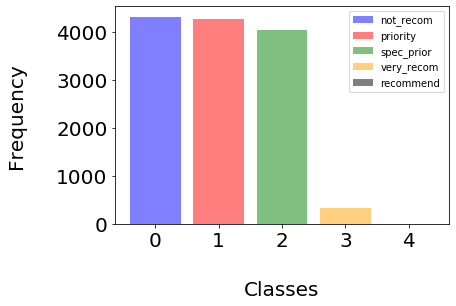

not_recom Label: 33.33%
priority Label: 32.92%
spec_prior Label: 31.2%
very_recom Label: 2.53%
recommend Label: 0.02%


In [186]:
colors = ['b','r','g','orange','black']
labels = count.index
for i in range(5):
    plt.bar(np.arange(1)+i,count['Counts'][i],color=colors[i],alpha=0.5, label=labels[i])
plt.xlabel('Classes',fontsize=20, labelpad=30)
plt.ylabel('Frequency',fontsize=20, labelpad=30)
plt.xticks(np.arange(5),[str(i) for i in range(5)],fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()
for i in range(5):
    print("{} Label: {}%".format(labels[i],round(count['Counts'][i]*100/count['Counts'].sum(),2)))    


It's clear that we will dropout both the samples that represents the "recommend" label, because they are to few, so for a semi-supervised classification task, two samples it's not needed, a human being can do this task itself.
However we can see that the other labels compared to 'very_recom' are 1317.39%, 1301.18% and 1233.2% higher in respect with 'not_recom', 'priority' and 'spec_prior'.

## Data Preprocessing

Let's eliminate both rows that represents the 'recommend' label.

In [187]:
indexes = nur[nur['target']=='recommend'].index
indexes



Int64Index([0, 3], dtype='int64')

In [188]:
nur = nur.drop(indexes)
nur = nur.reset_index(drop=True)
nur['target'].value_counts()
nur

,parents,has_nurs,form,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
3,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
4,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
5,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
6,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
7,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom
8,usual,proper,complete,1,convenient,inconv,nonprob,priority,priority
9,usual,proper,complete,1,convenient,inconv,nonprob,not_recom,not_recom


Now let's encode the dataset

In [189]:
le = LabelEncoder()

In [190]:
nur_features = nur[nur.columns.values[:-1]]
attributes = nur.columns.values[:-1]

print(attributes)
nur_features.head(10)

['parents' 'has_nurs' 'form' 'children' 'housing' 'finance' 'social'
 'health']


,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,priority
3,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom
4,usual,proper,complete,1,convenient,convenient,problematic,recommended
5,usual,proper,complete,1,convenient,convenient,problematic,priority
6,usual,proper,complete,1,convenient,convenient,problematic,not_recom
7,usual,proper,complete,1,convenient,inconv,nonprob,recommended
8,usual,proper,complete,1,convenient,inconv,nonprob,priority
9,usual,proper,complete,1,convenient,inconv,nonprob,not_recom


In [191]:
for i in range(attributes.size):
    nur_features.loc[:,attributes[i]+"_cat"] = le.fit_transform(nur_features.loc[:,attributes[i]])
nur_features = nur_features.drop(columns=attributes)

In [192]:
nur_features

,parents_cat,has_nurs_cat,form_cat,children_cat,housing_cat,finance_cat,social_cat,health_cat
0,2,3,0,0,0,0,0,1
1,2,3,0,0,0,0,0,0
2,2,3,0,0,0,0,2,1
3,2,3,0,0,0,0,2,0
4,2,3,0,0,0,0,1,2
5,2,3,0,0,0,0,1,1
6,2,3,0,0,0,0,1,0
7,2,3,0,0,0,1,0,2
8,2,3,0,0,0,1,0,1
9,2,3,0,0,0,1,0,0


Okay, now we will transform the target column into encoded labels, and then add it to nur_features.

In [193]:
nur_tar = nur['target'].to_frame()
nur_tar

,target
0,priority
1,not_recom
2,priority
3,not_recom
4,priority
5,priority
6,not_recom
7,very_recom
8,priority
9,not_recom


In [194]:
nur_tar.loc[:,'target_cat'] = le.fit_transform(nur_tar.loc[:,'target'])

In [195]:
nur_tar = nur_tar.drop(columns=['target'])

In [196]:
nur_tar

,target_cat
0,1
1,0
2,1
3,0
4,1
5,1
6,0
7,3
8,1
9,0


Now, let's join the data! :)

In [197]:
nursery_enc = pd.concat([nur_features,nur_tar],axis=1)

In [198]:
nursery_enc

,parents_cat,has_nurs_cat,form_cat,children_cat,housing_cat,finance_cat,social_cat,health_cat,target_cat
0,2,3,0,0,0,0,0,1,1
1,2,3,0,0,0,0,0,0,0
2,2,3,0,0,0,0,2,1,1
3,2,3,0,0,0,0,2,0,0
4,2,3,0,0,0,0,1,2,1
5,2,3,0,0,0,0,1,1,1
6,2,3,0,0,0,0,1,0,0
7,2,3,0,0,0,1,0,2,3
8,2,3,0,0,0,1,0,1,1
9,2,3,0,0,0,1,0,0,0


Let's save the data

In [199]:
nursery_enc.to_csv('nursery_enc.data')

Now, we will use the one hot encoder method :D

In [200]:
attr = nur.columns.values[:-1]
nur_f = nur[attr]

In [201]:
attr

array(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health'], dtype=object)

In [202]:
enc = OneHotEncoder(handle_unknown='ignore')

In [203]:
for i in range(attr.size):
    vals = nur[attr[i]].unique()
    a = pd.DataFrame(enc.fit_transform(nur[[attr[i]]]).toarray(), columns=[attr[i]+'_'+vals[j] for j in range(len(vals))])
    nur_f = nur_f.join(a)
    nur_f = nur_f.drop([attr[i]],axis=1)
nur_f.head(10)


,parents_usual,parents_pretentious,parents_great_pret,has_nurs_proper,has_nurs_less_proper,has_nurs_improper,has_nurs_critical,has_nurs_very_crit,form_complete,form_completed,...,housing_less_conv,housing_critical,finance_convenient,finance_inconv,social_nonprob,social_slightly_prob,social_problematic,health_priority,health_not_recom,health_recommended
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Now, let's join the categorical target dataframe with the one hot encoded.

In [204]:
nursery_ohe = pd.concat([nur_f,nur_tar],axis=1)

In [205]:
nursery_ohe.head(10)

,parents_usual,parents_pretentious,parents_great_pret,has_nurs_proper,has_nurs_less_proper,has_nurs_improper,has_nurs_critical,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,finance_convenient,finance_inconv,social_nonprob,social_slightly_prob,social_problematic,health_priority,health_not_recom,health_recommended,target_cat
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0


Now, let's save the data :)

In [206]:
nursery_ohe.to_csv('nursery_ohe.data')